# Linear Regression

#### Week 02 - Programming Assignment
This notebook contains my Python solution to the first programming assignment of the course Machine Learning, taught by Andrew Ng in Coursera.  
Find my MATLAB solution [here](https://github.com/ritamds/machine-learning-coursera/tree/master/week02/week02-assignment).

## Content
* [Warm Up Exercise](#warmUpExercise)
* [Linear Regression with One Variable](#linearRegression1V)
* [Linear Regression with Multiple Variables](#linearRegressionMV)

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id="warmUpExercise"></a>

## Warm Up Exercise
The goal of this exercise is to return a 5*5 identity matrix.

In [214]:
def warm_up_exercise():
    return np.identity(5)

warm_up_exercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

<a id="linearRegression1V"></a>

## Linear Regression with One Variable
For this exercise, we will implement Linear Regression with one variable to predict profits for a food truck.  
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for products and populations from the cities. You would like to use this data to help you select which city to expand to next.  

In [215]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

X = data.iloc[:,0] #pd.iloc[] - selects and allocates to variable by [row, column]
y = data.iloc[:,1]

#### Visualizing the Data
We begin by examining the data: we will have a look at its first five rows, at some basic statistics and we will visualize the values in a scatter plot.

In [216]:
data.head() #pd.head() - returns top n (default 5) rows of Dataframe 

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [217]:
data.describe() #pd.describe() - returns basic statistical details

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


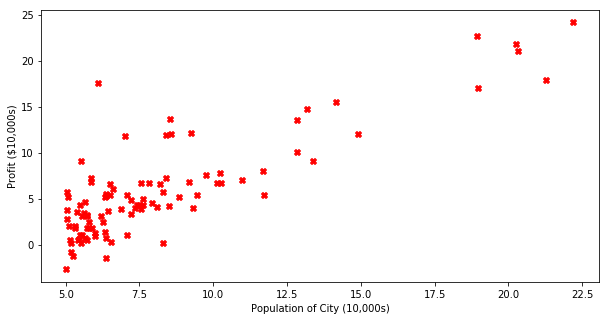

In [218]:
plt.scatter(X,y, c='red', marker='X', linewidths=1)
plt.rcParams['figure.figsize'] = (10,5)
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.show()

#### Preparing the Data
Now, we will prepare the data to be analysed. We start by adding another dimension to `X` and `y`, and initialize `theta` to 0.

In [219]:
m = len(X)

ones = np.ones((m,1)) #np.ones() - ones is a 2D array

X = X[:,np.newaxis] #np.newaxis - adds a new axis to X making it a 2D array
y = y[:, np.newaxis]

X = np.hstack((ones, X)) #np.hstack() - stacks arrays in sequence column-wise

theta = np.zeros([2,1])

#### Cost and Gradient Descent
In this part, we will fit the Linear Regression parameters `theta` to our dataset using `Gradient Descent`.  

First, we begin by defining the `Cost Function`, which evaluates the accuracy of our hypothesis by measuring the error between our model's `predictions` and the actual `y` value. We will test it with `theta` initialized to 0.  
Then, we will define and implement the optimization algorithm `Gradient Descent`. `Gradient Descent` will find the optimal parameters `theta` that reduce the error. We will verify that it is working correctly by plotting the `Cost Function` and checking if the value is decreasing with each step.

In [220]:
def cost_function(X, y, theta):
    """
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    """
    m = len(y)
    predictions = np.dot(X,theta) #np.dot() - returns the dot product of two arrays
    squared_error = np.square((predictions - y))
    sum_error = np.sum(squared_error)
    J = 1/(2*m) * sum_error
    
    return J

In [221]:
cost_J = cost_function(X,y,theta)
print ('With theta', theta.ravel(),', cost computed =', cost_J.round(2)) #np.ravel() - returns a flattened array

With theta [0. 0.] , cost computed = 32.07


In [222]:
def gradient_descent(X, y, theta, alpha=0.01, num_iters=1500):
    """
    Returns the optimal theta values and a list of Cost history, given a learning rate (alpha) and over a given number of iterations.
    """
    m = len(y)
    J_history = []
    
    for iter in range(num_iters):
        prediction = np.dot(X, theta)
        error = X.T.dot(prediction - y) #np.T - returns the transpose of the array (= np.transpose())
        theta = theta - (1/m) * alpha * error
        
        J_history.append(cost_function(X, y, theta))
        
    return (theta, J_history)

In [223]:
theta, J_history = gradient_descent(X, y, theta)

In [224]:
print('Theta found by gradient descent: ',theta.ravel().round(4))
print('h(x) = ' + str(round(theta[0,0],4))+ ' + ' + str(round(theta[1,0],4)) + 'x1')

Theta found by gradient descent:  [-3.6303  1.1664]
h(x) = -3.6303 + 1.1664x1


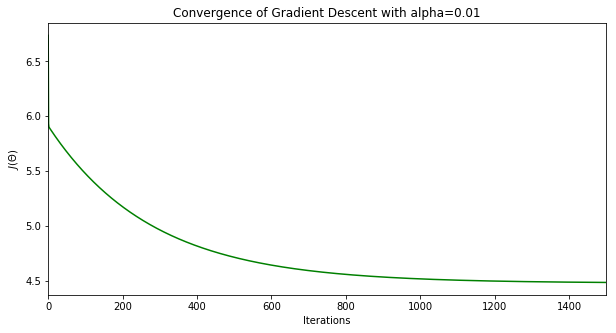

In [225]:
plt.plot(J_history, c='green')
plt.rcParams['figure.figsize'] = (10,5)
plt.ylabel('$J(\Theta)$')
plt.xlabel('Iterations')
plt.xlim(0,1500)
plt.title('Convergence of Gradient Descent with alpha=0.01')
plt.show()

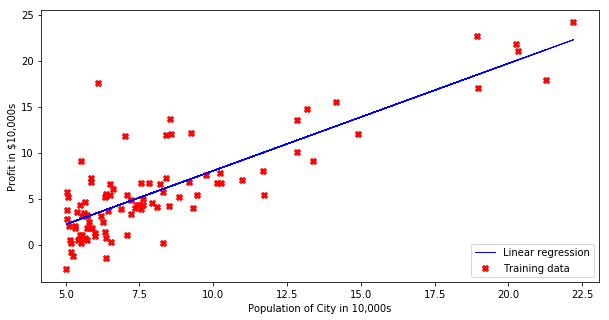

In [226]:
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(X[:,1], y, c='red', marker='X', linewidth=1, label='Training data')
plt.plot(X[:,1], np.dot(X, theta), c='b', linewidth=1, label='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)
plt.show()

#### Making Predictions
Finally, we will use our computed values for `theta` to make predictions on profits in areas with `35,000` and `70,000` people.

In [227]:
def predict_profit(population, theta):
    """
    Predicts profit according to population size.
    """
    return ((theta.T.dot([1, population])*10000).round(2)[0])

In [228]:
print('For population = 35.000, we predict a profit of $',predict_profit(3.5, theta))
print('For population = 70.000, we predict a profit of $',predict_profit(7, theta))

For population = 35.000, we predict a profit of $ 4519.77
For population = 70.000, we predict a profit of $ 45342.45


<a id="linearRegressionMV"></a>

## Linear Regression with Multiple Variables
In this part, we will implement Linear Regression with multiple variables to predict the prices of houses.  
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [229]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Area', 'Bedrooms', 'Price'])

X2 = data2.iloc[:,0:2]
y2 = data2.iloc[:,2]

#### Visualizing the Data
Again, we begin by examining the data: we will have a look at its first five rows, at some basic statistics and we will plot the values in two scatter plots.

In [230]:
data2.head()

,Area,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [231]:
data2.describe()

,Area,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


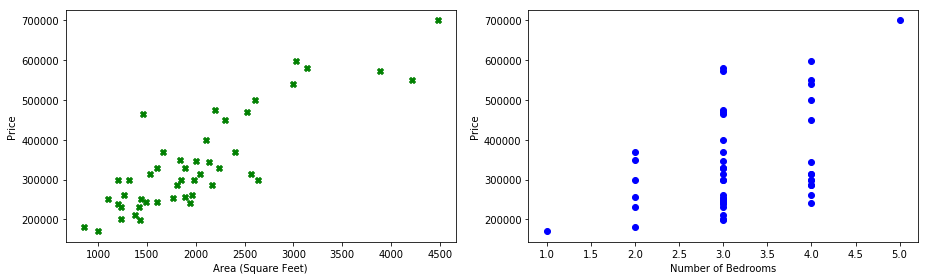

In [232]:
plt.rcParams['figure.figsize'] = (13,4)

plt.subplot(1, 2, 1)
plt.scatter(X2.iloc[:,0], y2, c='green', marker='X', linewidths=1)
plt.ylabel('Price')
plt.xlabel('Area (Square Feet)')

plt.subplot(1, 2, 2)
plt.scatter(X2.iloc[:,1], y2, c='blue', marker='o', linewidths=1)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

plt.tight_layout()

plt.show()

#### Feature Normalization
By looking at the values, we can see that the house sizes are about `1000` times the number of bedrooms. So we need to perform `Feature Scaling` to make `Gradient Descent` converge more quickly.

In [233]:
def feature_normalization(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1
    """
    mean_X = np.mean(X, axis=0) #mean of each column
    std_X = np.std(X, axis=0) #standard deviation of each column
    X_norm = (X - mean_X) / std_X
    
    return (X_norm, mean_X, std_X)

#### Preparing the Data
Now, we will prepare the data to be analysed.

In [234]:
m2 = len(X2)

ones2 = np.ones((m2, 1))

X2 = X2.to_numpy() #pd.to_numpy() - converts Dataframe to NumPy array

X2_norm, mean_X2, std_X2 = feature_normalization(X2)

X2_norm = np.hstack((ones2, X2_norm))
y2 = y2[:, np.newaxis]

theta2 = np.zeros((3,1))

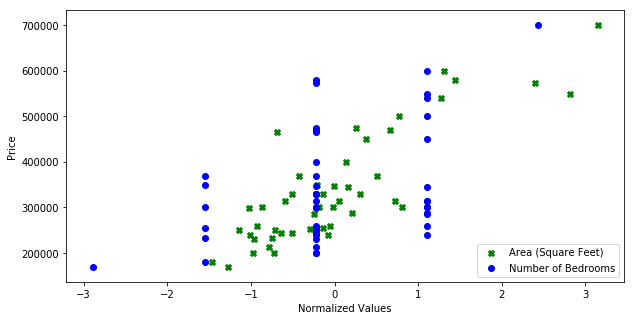

In [235]:
plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(X2_norm[:,1], y2, c='green', marker='X', linewidths=1, label='Area (Square Feet)')
plt.scatter(X2_norm[:,2], y2, c='blue', marker='o', linewidths=1, label='Number of Bedrooms')
plt.xlabel('Normalized Values')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

#### Cost and Gradient Descent
Now, we will test the cost of using `theta` initialized to `0`. Then, we will perform `Gradient Descent` on our data and compute the values of `theta`. We will see that it is working correctly on the plot.

In [236]:
cost_J2 = cost_function(X2_norm,y2,theta2)
print ('With theta', theta2.ravel(),', cost computed =',cost_J2.round(2))

With theta [0. 0. 0.] , cost computed = 65591548106.46


In [237]:
theta2, J_history2 = gradient_descent(X2_norm, y2, theta2, 0.05, 4000)
cost_J2 = cost_function(X2_norm,y2,theta2)
print('Theta found by gradient descent: ',theta2.ravel().round(4))
print ('With theta', theta2.ravel(),', cost computed =',cost_J2.round(2))
print('h(x) = ' + str(round(theta2[0,0],4))+ ' + ' + str(round(theta2[1,0],4)) + 'x1'+ ' + ' + str(round(theta2[2,0],4)) + 'x2')

Theta found by gradient descent:  [340412.6596 109447.7965  -6578.3549]
With theta [340412.65957447 109447.79646964  -6578.35485416] , cost computed = 2043280050.6
h(x) = 340412.6596 + 109447.7965x1 + -6578.3549x2


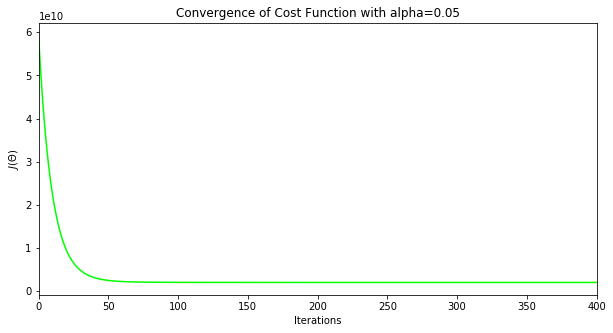

In [238]:
plt.plot(J_history2, c='lime')
plt.rcParams['figure.figsize'] = (10,5)
plt.ylabel('$J(\Theta)$')
plt.xlabel('Iterations')
plt.xlim(0,400)
plt.title('Convergence of Cost Function with alpha=0.05')
plt.show()

#### Making Predictions
Finally, we will use our computed values for `theta` to predict the selling price of a house with `1650` square feet and `3` bedrooms.

In [239]:
def predict_price(area, num_bedrooms, theta):
    """
    Calculates the predicted price given an area (square feet) and a number of bedrooms. 
    """
    ones = np.ones((1, 1))
    
    test = np.array([area,num_bedrooms])
    test_scaled = (test-mean_X2)/std_X2
    test_scaled = test_scaled[np.newaxis, :]
    test_scaled = np.hstack((ones, test_scaled))
    
    prediction = np.dot(test_scaled, theta)
    
    return (area, num_bedrooms, prediction)

In [240]:
area, num_bedrooms, predicted_price = predict_price(1650,3,theta2)
print ('Predicted price of a '+ str(area) + ' square feet, '+ str(num_bedrooms)+'-bedroom house (using gradient descent): $' + str(round(predicted_price.ravel()[0],2)))

Predicted price of a 1650 square feet, 3-bedroom house (using gradient descent): $293081.46


#### Normal Equation
Now, as an alternative to `Gradient Descent`, we will compute the values for `theta` using the `Normal Equation`, and predict the selling price of the same house.  
`Normal Equation` is an analytical approach to Linear Regression that allows us to find the values of `theta` directly. It is a more efficient option when we are working with datasets with small features.

In [241]:
X3 = data2.iloc[:,0:2]
y3 = data2.iloc[:,2]

m3 = len(X3)
ones3 = np.ones((m3, 1))
X3 = np.hstack((ones3, X3))

In [242]:
def normal_equation(X,y):
    """
    Normal Equation.
    """
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [243]:
theta3 = normal_equation(X3,y3)
print ('Theta found by Normal Equation:', theta3.ravel().round(4))

Theta found by Normal Equation: [89597.9095   139.2107 -8738.0191]


In [244]:
def predict_price_normal(area, num_bedrooms,theta):
    """
    Calculates the price by Normal Equation.
    """
    price = np.array([1, area, num_bedrooms]).dot(theta)
    return (price, area, num_bedrooms)

In [245]:
predicted_price_normal, area, num_bedrooms = predict_price_normal(1650, 3, theta3)
print ('Predicted price of a '+ str(area) + ' square feet, '+ str(num_bedrooms)+'-bedroom house (using Normal Equation): $' + str(round(predicted_price_normal,2)))

Predicted price of a 1650 square feet, 3-bedroom house (using Normal Equation): $293081.46


As expected, the predicted price is the same, using `Gradient Descent` or `Normal Equation`.